In [3]:

import urllib.request
import tarfile
import os

# Download the dataset
dataset_url = "http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"
filename = "food-101.tar.gz"

if not os.path.exists("food-101.tar.gz"):
    print("Downloading Food-101 dataset...")
    urllib.request.urlretrieve(dataset_url, filename)
    print("Download complete.")
else:
    print("File already downloaded.")

# Extract the dataset
if not os.path.exists("food-101"):
    print("Extracting the dataset...")
    with tarfile.open(filename, "r:gz") as tar:
        tar.extractall()
    print("Extraction complete.")
else:
    print("Dataset already extracted.")


File already downloaded.
Dataset already extracted.


In [4]:
import tensorflow as tf

# # Set dataset path
# dataset_dir = "food-101/images"

# # Create training and validation datasets (80/20 split)
# raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     dataset_dir,
#     validation_split=0.2,
#     subset="training",
#     seed=123,
#     image_size=(224, 224),
#     batch_size=32
# )

# raw_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     dataset_dir,
#     validation_split=0.2,
#     subset="validation",
#     seed=123,
#     image_size=(224, 224),
#     batch_size=32
# )

# # Access class names before prefetch
# print(raw_train_ds.class_names[:10])

# # Improve performance
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = raw_train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = raw_val_ds.prefetch(buffer_size=AUTOTUNE)


# Image size and batch size for training
image_size = (160, 160)
batch_size = 16

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "food-101/images",               # path to dataset folder
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "food-101/images",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

# Show class names (optional)
print(train_ds.class_names[:10])


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 101000 files belonging to 101 classes.
Using 80800 files for training.
Found 101000 files belonging to 101 classes.
Using 20200 files for validation.
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [5]:
# !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
# !tar -xvzf food-101.tar.gz


In [6]:
# import os
# import shutil
# import random

# #  Path to extracted Food-101 images
# source_dir = "food-101/images"
# target_dir = "food_subset"

# # Choose how many classes and images per class
# NUM_CLASSES = 101
# IMAGES_PER_CLASS = 800
# TRAIN_SPLIT = 0.8

# # Select top N classes
# all_classes = sorted(os.listdir(source_dir))[:NUM_CLASSES]
# print(f"Selected {NUM_CLASSES} classes.")

# #  Create subset folders and split images
# for cls in all_classes:
#     src_path = os.path.join(source_dir, cls)
#     images = sorted(os.listdir(src_path))[:IMAGES_PER_CLASS]
#     random.shuffle(images)

#     split_index = int(len(images) * TRAIN_SPLIT)
#     train_images = images[:split_index]
#     test_images = images[split_index:]

#     for subset, subset_images in [("train", train_images), ("test", test_images)]:
#         dest_dir = os.path.join(target_dir, subset, cls)
#         os.makedirs(dest_dir, exist_ok=True)

#         for img in subset_images:
#             src_img = os.path.join(src_path, img)
#             dst_img = os.path.join(dest_dir, img)
#             shutil.copyfile(src_img, dst_img)

# print(f" Created 'food_subset/train' and 'food_subset/test' with {NUM_CLASSES} classes and {IMAGES_PER_CLASS} images/class.")


In [7]:
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras import layers, models
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


# # Data augmentation for training
# train_gen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True
# ).flow_from_directory(
#     "food_subset/train",
#     target_size=(224, 224),
#     class_mode="categorical",
#     batch_size=32
# )

# # Validation generator
# val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
#     "food_subset/test",
#     target_size=(224, 224),
#     class_mode="categorical",
#     batch_size=32
# )

# num_classes = len(train_gen.class_indices)
# print(f"Loaded {num_classes} classes.")


In [8]:

# # base_model = MobileNetV2(
# #     input_shape=(224, 224, 3),
# #     include_top=False,
# #     weights='imagenet'
# # )
# # base_model.trainable = False

# # model = models.Sequential([
# #     base_model,
# #     layers.GlobalAveragePooling2D(),
# #     layers.Dense(256, activation='relu'),
# #     layers.Dropout(0.3),
# #     layers.Dense(num_classes, activation='softmax')
# # ])

# # model.compile(
# #     optimizer=Adam(1e-4),
# #     loss='categorical_crossentropy',
# #     metrics=['accuracy']
# # )

# # model.summary()

# base_model = MobileNetV2(
#     input_shape=(160, 160, 3),  
#     include_top=False,
#     weights='imagenet'
# )

# base_model.trainable = False

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
# ])

# model = models.Sequential([
#     data_augmentation,
#     base_model,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(num_classes, activation='softmax')
# ])

# # Use sparse if labels are integer-encoded
# model.compile(
#     optimizer=Adam(1e-4),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.summary()

In [9]:
# from tensorflow.keras.callbacks import Callback
# import os

# # class SaveEveryNEpochs(Callback):
# #     def __init__(self, every_n_epochs, filepath_prefix="model_epoch"):
# #         self.every_n_epochs = every_n_epochs
# #         self.filepath_prefix = filepath_prefix

# #     def on_epoch_end(self, epoch, logs=None):
# #         if (epoch + 1) % self.every_n_epochs == 0:
# #             filename = f"{self.filepath_prefix}_{epoch + 1}.h5"
# #             self.model.save(filename)
# #             print(f"\n Saved model at epoch {epoch + 1} to {filename}")

# #             try:
# #                 from google.colab import files
# #                 files.download(filename)
# #                 print(f"⬇ Download triggered: {filename}")
# #             except ImportError:
# #                 print("Not running in Colab; download not triggered.")

# # Save model every N epochs
# class SaveEveryNEpochs(tf.keras.callbacks.Callback):
#     def __init__(self, N, filepath_prefix="model"):
#         super().__init__()
#         self.N = N
#         self.filepath_prefix = filepath_prefix

#     def on_epoch_end(self, epoch, logs=None):
#         if (epoch + 1) % self.N == 0:
#             filename = f"{self.filepath_prefix}_epoch_{epoch+1}.keras"
#             self.model.save(filename)



In [10]:
# # callbacks = [
# #     ModelCheckpoint("mobilenet_frozen.h5", save_best_only=True, monitor="val_accuracy", mode="max"),
# #     EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
# #     ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
# # ]

# # history = model.fit(
# #     train_gen,
# #     validation_data=val_gen,
# #     epochs=100,
# #     callbacks=callbacks
# # )


# callbacks = [
#     SaveEveryNEpochs(5, filepath_prefix="mobilenet_epoch"),
#     tf.keras.callbacks.ModelCheckpoint("mobilenet_best.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
#     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#     tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
# ]


# history = model.fit(
#      train_gen,
#      validation_data=val_gen,
#      epochs=100,
#      callbacks=callbacks
#  )

In [11]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Custom callback to save model every N epochs
class SaveEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, n, filepath_prefix):
        super().__init__()
        self.n = n
        self.filepath_prefix = filepath_prefix

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.n == 0:
            filename = f"{self.filepath_prefix}_epoch_{epoch + 1}.keras"
            self.model.save(filename)

# Image size and batch size
image_size = (160, 160)
batch_size = 32

# Load data generators (make sure target_size = 160x160)
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    "food_subset/train",
    target_size=image_size,
    class_mode="categorical",
    batch_size=batch_size
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "food_subset/test",
    target_size=image_size,
    class_mode="categorical",
    batch_size=batch_size
)

# Get number of classes
num_classes = len(train_gen.class_indices)

# Define MobileNetV2 base model
base_model = MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base initially

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    SaveEveryNEpochs(5, filepath_prefix="mobilenet_epoch"),
    ModelCheckpoint("mobilenet_best.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
]

# Train model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=100,
    callbacks=callbacks
)


Found 80690 images belonging to 101 classes.
Found 48534 images belonging to 101 classes.


C:\Users\Ashwini kannan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.1280 - loss: 3.9847

C:\Users\Ashwini kannan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2522/2522 ━━━━━━━━━━━━━━━━━━━━ 1860s 734ms/step - accuracy: 0.1280 - loss: 3.9845 - val_accuracy: 0.4264 - val_loss: 2.4023 - learning_rate: 1.0000e-04
Epoch 2/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 1951s 773ms/step - accuracy: 0.3514 - loss: 2.6608 - val_accuracy: 0.4795 - val_loss: 2.1170 - learning_rate: 1.0000e-04
Epoch 3/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 1894s 751ms/step - accuracy: 0.4036 - loss: 2.4056 - val_accuracy: 0.5107 - val_loss: 1.9729 - learning_rate: 1.0000e-04
Epoch 4/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 1848s 733ms/step - accuracy: 0.4331 - loss: 2.2792 - val_accuracy: 0.5270 - val_loss: 1.8917 - learning_rate: 1.0000e-04
Epoch 5/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 1866s 740ms/step - accuracy: 0.4466 - loss: 2.1996 - val_accuracy: 0.5351 - val_loss: 1.8323 - learning_rate: 1.0000e-04
Epoch 6/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 1876s 744ms/step - accuracy: 0.4664 - loss: 2.1322 - val_accuracy: 0.5435 - val_loss: 1.7949 - learning_rate: 1.0000e-04
Epoch 7/100
2522/2522 ━━━━━━

MemoryError: bad allocation

In [15]:
import os
print(os.listdir("."))


['.ipynb_checkpoints', '.opera', '1.jpg', '1.png', '1001_DFA_ANG_XX.wav', '1001_IEO_SAD_HI.wav', '111food101_with_nutrition_and_gl.xlsx', '18.wav', '1880_ASHWINI_KANNAN.K_Data_Science_Final_Report_3628_1984730693.docx', '1Food_image_recognition_and_nutritional_analysis.ipynb', '1_2kA5cLxeTWH5XVlXm7FVFA.jpg', '2388cf4c7e7b64d35ee2079795cb92bd.jpg', '2cd9cf4ae54379b5f723a41a48deec12.jpg', '5.pdf', '5410fe1036fdc78baf1291def67beafd.jpg', '6e6ac30d5393209ff10b4c8462c21eb7.jpg', '7izvO4Jg.png', '93240130-ec27-4d3f-8fea-1bfdce1f9ec4.png', '9e31620beb0fbbea7fe35c5b199dee85.jpg', 'Aadhar scan.pdf', 'ad6acfe1250ea007ad1c9b838c37aa35.jpg', 'AdmissionCard-16790276-597f98b5-11b8-4f41-85fc-fbfd577cafaf-742.pdf', 'AD_MS.csv', 'afood101_with_nutrition_and_gl (1).xlsx', 'AlexNet.pdf', 'alumni_form.png', 'Alumni_qrcode (1).png', 'Alumni_qrcode.png', 'Anaconda3-2025.06-0-Windows-x86_64.exe', 'AntiraggingAffidavitForm.pdf', 'Ash.jpg', 'AshwiniKannan_Resume.pdf', 'Ashwini_KannanResume (1).pdf', 'Ashwini_K

In [16]:
from tensorflow.keras.models import load_model

model = load_model("mobilenet_epoch_epoch_90.keras")  # No /mnt/data


In [17]:
model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=100,
    initial_epoch=90,
    callbacks=[
        ModelCheckpoint("mobilenet_best_continued.keras", save_best_only=True, monitor="val_accuracy", mode="max"),
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
    ]
)


Epoch 91/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 2342s 927ms/step - accuracy: 0.5917 - loss: 1.5166 - val_accuracy: 0.6723 - val_loss: 1.1912 - learning_rate: 1.0000e-04
Epoch 92/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 2273s 901ms/step - accuracy: 0.5847 - loss: 1.5258 - val_accuracy: 0.6721 - val_loss: 1.1895 - learning_rate: 1.0000e-04
Epoch 93/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 2278s 903ms/step - accuracy: 0.5913 - loss: 1.5124 - val_accuracy: 0.6725 - val_loss: 1.1883 - learning_rate: 1.0000e-04
Epoch 94/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 2278s 903ms/step - accuracy: 0.5912 - loss: 1.5140 - val_accuracy: 0.6742 - val_loss: 1.1905 - learning_rate: 1.0000e-04
Epoch 95/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 2299s 912ms/step - accuracy: 0.5891 - loss: 1.5259 - val_accuracy: 0.6715 - val_loss: 1.1928 - learning_rate: 1.0000e-04
Epoch 96/100
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 2189s 868ms/step - accuracy: 0.5868 - loss: 1.5315 - val_accuracy: 0.6729 - val_loss: 1.1822 - learning_rate: 1.0000e-04
Epoch 97/1

In [18]:

# base_model.trainable = True
# for layer in base_model.layers[:-30]:
#     layer.trainable = False

# model.compile(
#     optimizer=Adam(1e-5),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# history_finetune = model.fit(
#     train_gen,
#     validation_data=val_gen,
#     epochs=30,
#     callbacks=callbacks
# )

# Unfreeze the top 30 layers of the base model for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Recompile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=Adam(1e-5),  # Lower LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tuning training
history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=callbacks
)


Epoch 1/30
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 3048s 1s/step - accuracy: 0.5977 - loss: 1.4852 - val_accuracy: 0.6793 - val_loss: 1.1595 - learning_rate: 1.0000e-05
Epoch 2/30
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 2788s 1s/step - accuracy: 0.5993 - loss: 1.4728 - val_accuracy: 0.6792 - val_loss: 1.1588 - learning_rate: 1.0000e-05
Epoch 3/30
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 2773s 1s/step - accuracy: 0.5996 - loss: 1.4722 - val_accuracy: 0.6789 - val_loss: 1.1589 - learning_rate: 1.0000e-05
Epoch 4/30
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 2754s 1s/step - accuracy: 0.6029 - loss: 1.4698 - val_accuracy: 0.6802 - val_loss: 1.1554 - learning_rate: 1.0000e-05
Epoch 5/30
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 2723s 1s/step - accuracy: 0.6018 - loss: 1.4629 - val_accuracy: 0.6805 - val_loss: 1.1542 - learning_rate: 1.0000e-05
Epoch 6/30
2522/2522 ━━━━━━━━━━━━━━━━━━━━ 2727s 1s/step - accuracy: 0.6016 - loss: 1.4665 - val_accuracy: 0.6805 - val_loss: 1.1533 - learning_rate: 1.0000e-05
Epoch 7/30
2522/2522 ━━━━━━━━━━━━━━━━━━━

In [99]:
# Save the final trained model after all training and evaluation
model.save("mobilenet_final_full.keras")
print("Final model saved as 'mobilenet_final_full.keras'")


Final model saved as 'mobilenet_final_full.keras'


In [19]:
# import pickle

# # Save training histories
# with open("history_frozen.pkl", "wb") as f:
#     pickle.dump(history.history, f)

# with open("history_finetune.pkl", "wb") as f:
#     pickle.dump(history_finetune.history, f)

# # Save class indices (for decoding predictions later)
# with open("class_indices.pkl", "wb") as f:
#     pickle.dump(train_gen.class_indices, f)

# # Save final model (full model)
# model.save("mobilenet_final.keras")

# print(" Model, histories, and class labels saved.")


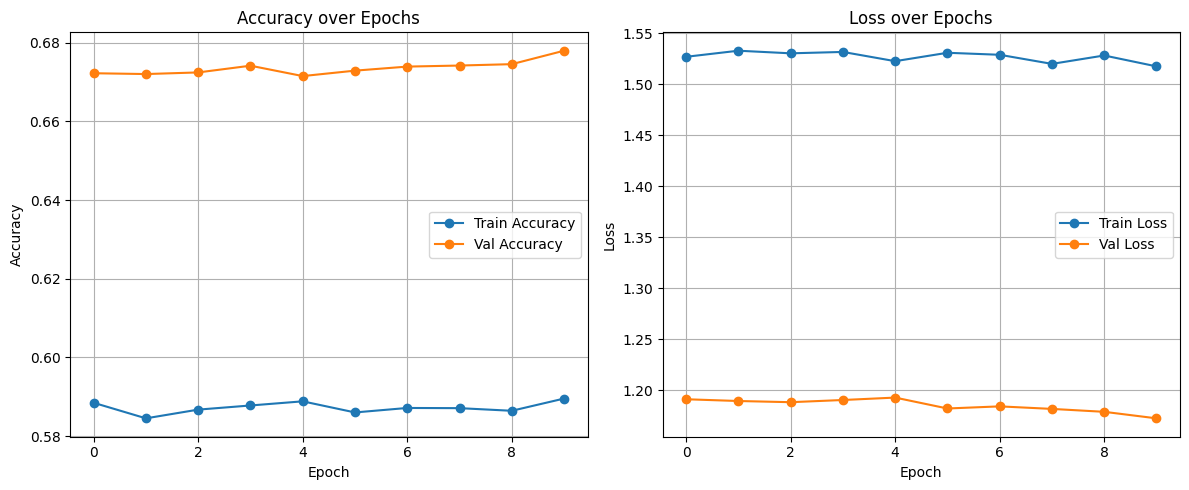

In [21]:
import matplotlib.pyplot as plt

# Check if history is available and contains required keys
if 'accuracy' in history.history and 'val_accuracy' in history.history \
   and 'loss' in history.history and 'val_loss' in history.history:

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("History object missing required keys.")


1517/1517 ━━━━━━━━━━━━━━━━━━━━ 1391s 916ms/step


<Figure size 1000x1000 with 0 Axes>

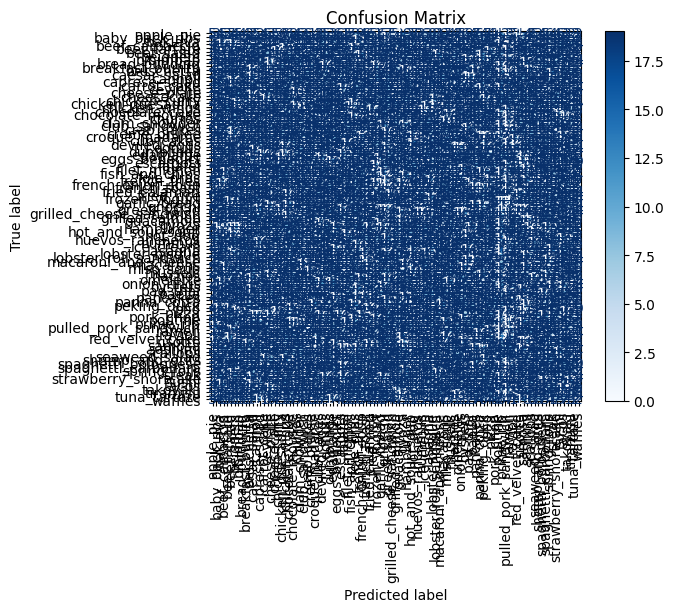

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# True and predicted labels
y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

# Class names
class_names = list(val_gen.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation=90, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [24]:
from sklearn.metrics import classification_report


print(classification_report(y_true, y_pred_classes, target_names=class_names))


                         precision    recall  f1-score   support

              apple_pie       0.02      0.01      0.01       479
         baby_back_ribs       0.00      0.00      0.00       472
                baklava       0.01      0.01      0.01       472
         beef_carpaccio       0.02      0.02      0.02       465
           beef_tartare       0.01      0.01      0.01       483
             beet_salad       0.01      0.01      0.01       472
               beignets       0.01      0.01      0.01       524
               bibimbap       0.01      0.01      0.01       475
          bread_pudding       0.01      0.01      0.01       477
      breakfast_burrito       0.01      0.01      0.01       471
             bruschetta       0.01      0.01      0.01       537
           caesar_salad       0.01      0.01      0.01       471
                cannoli       0.01      0.01      0.01       486
          caprese_salad       0.01      0.01      0.01       456
            carrot_cake 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


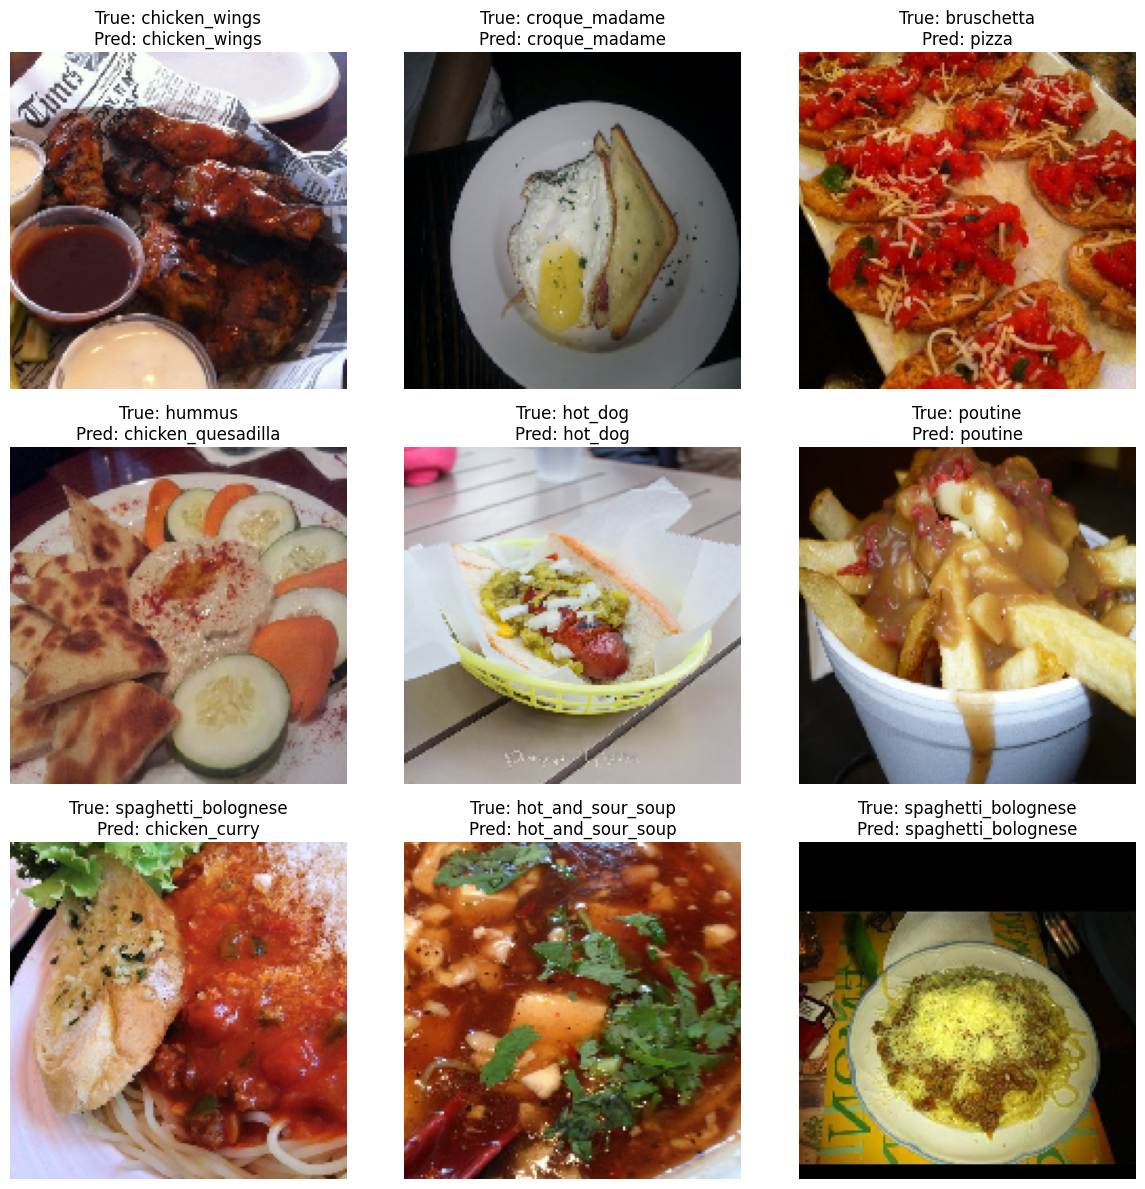

In [25]:
import matplotlib.pyplot as plt

# Get a batch of validation images and predictions
val_images, val_labels = next(val_gen)
predictions = model.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_labels, axis=1)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(val_images[i])
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


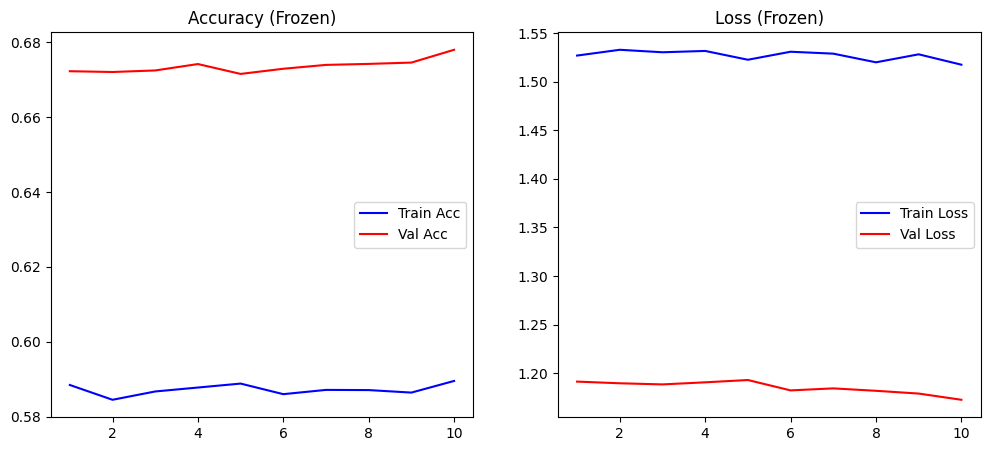

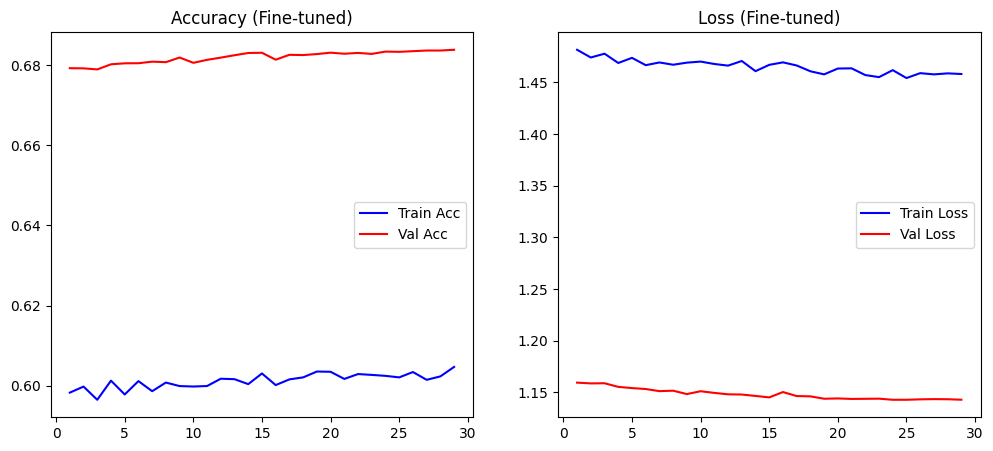

In [26]:

def plot_history(history, title_suffix=''):
    acc = history.history.get('accuracy')
    val_acc = history.history.get('val_accuracy')
    loss = history.history.get('loss')
    val_loss = history.history.get('val_loss')

    if acc is None or val_acc is None:
        print("No accuracy data found.")
        return

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Train Acc')
    plt.plot(epochs, val_acc, 'r', label='Val Acc')
    plt.title('Accuracy' + title_suffix)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Train Loss')
    plt.plot(epochs, val_loss, 'r', label='Val Loss')
    plt.title('Loss' + title_suffix)
    plt.legend()
    plt.show()

plot_history(history, title_suffix=' (Frozen)')
plot_history(history_finetune, title_suffix=' (Fine-tuned)')


In [27]:
# from tensorflow.keras.models import load_model
# import pickle

# # Load the model
# model = load_model("mobilenet_final.h5")

# # Load class labels
# with open("class_indices.pkl", "rb") as f:
#     class_indices = pickle.load(f)

# # Optional: reverse mapping
# idx_to_class = {v: k for k, v in class_indices.items()}

# # Load training history
# with open("history_finetune.pkl", "rb") as f:
#     history = pickle.load(f)


In [60]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess image
img_path = r"C:\Users\Ashwini kannan\Downloads\your_imagewaf.jpg"

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

# Predict
pred = model.predict(x)
predicted_class = list(train_gen.class_indices.keys())[np.argmax(pred)]
print(" Predicted Food:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
 Predicted Food: waffles


In [61]:
predicted_class

'waffles'

In [33]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
!pip install openpyxl


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 259.2 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/250.9 kB 726.2 kB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


+------------------+-------------------+-----------------+------------------+---------------------+-----------+---------------+-------------------+
| Predicted Food   | Diabetes Advice   |   Glycemic Load |   Glycemic Index |   Carbohydrates (g) |   Fat (g) |   Protein (g) |   Calories_(kcal) |
+==================+===================+=================+==================+=====================+===========+===============+===================+
| waffles          | Avoid             |         36.9132 |               76 |               48.57 |        10 |          2.86 |               300 |
+------------------+-------------------+-----------------+------------------+---------------------+-----------+---------------+-------------------+


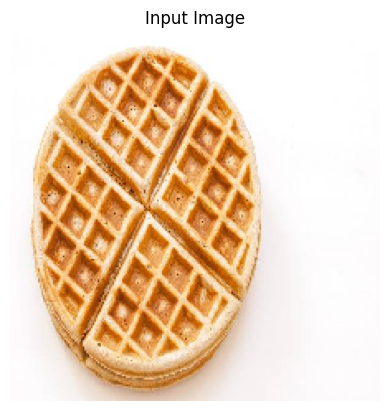

In [62]:
import pandas as pd
from tabulate import tabulate


# Load Excel file
df = pd.read_excel(r"C:\Users\Ashwini kannan\Downloads\GL_food101.xlsx")
df.columns = df.columns.str.strip()

# Find matching row
match = df[df["Food101_Label"].str.lower() == predicted_class.lower()]

if not match.empty:
    row = match.iloc[0]

    # Extract nutrients
    gl = row.get("Glycemic_Load", "N/A")
    gi = row.get("GI_Value", "N/A")
    carbs = row.get("Carbs_g", "N/A")
    fat = row.get("Fat_g", "N/A")
    protein = row.get("Protein_g", "N/A")
    Calories = row.get("Calories_kcal", "N/A")

    # Determine diabetes advice
    if gl != "N/A":
        if gl < 10:
            advice = " Safe"
        elif gl < 20:
            advice = "Moderate"
        else:
            advice = "Avoid"
    else:
        advice = "Unknown"

    # Build the table
    table = [{
        "Predicted Food": predicted_class,
        "Diabetes Advice": advice,
        "Glycemic Load": gl,
        "Glycemic Index": gi,
        "Carbohydrates (g)": carbs,
        "Fat (g)": fat,
        "Protein (g)": protein,
        "Calories_(kcal)":Calories
    }]

    # Print table with borders
    print(tabulate(table, headers="keys", tablefmt="grid"))

else:
    print(f"Food class '{predicted_class}' not found in GL database.")

# Show the image
plt.imshow(image.array_to_img(x[0]))
plt.title("Input Image")
plt.axis('off')
plt.show()


In [ ]:
###Graphs

In [106]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model(r"C:\Users\Ashwini kannan\Downloads\mobilenet_epoch_epoch_90.keras")

# Print the model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 101)                 │          25,957 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,319,665 (12.66 MB)

 Trainable params: 353,893 (1.35 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 707,788 (2.70 MB)

In [108]:
# Assuming your base model was added like: model.add(mobile_net_base)
# You can access it directly:
mobilenet_base = model.layers[0]  # First layer is likely the base model

mobilenet_base.summary()
print(f"Total layers in base model: {len(mobilenet_base.layers)}")


Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 160, 160, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 80, 80, 32)        │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 80, 80, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 80, 80, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 80, 80, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 80, 80, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 80, 80, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 80, 80, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 80, 80, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 80, 80, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 80, 80, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 80, 80, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 81, 81, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 40, 40, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Total layers in base model: 154


In [107]:
# Total number of layers
print(f"\nTotal layers in the model: {len(model.layers)}")



Total layers in the model: 5


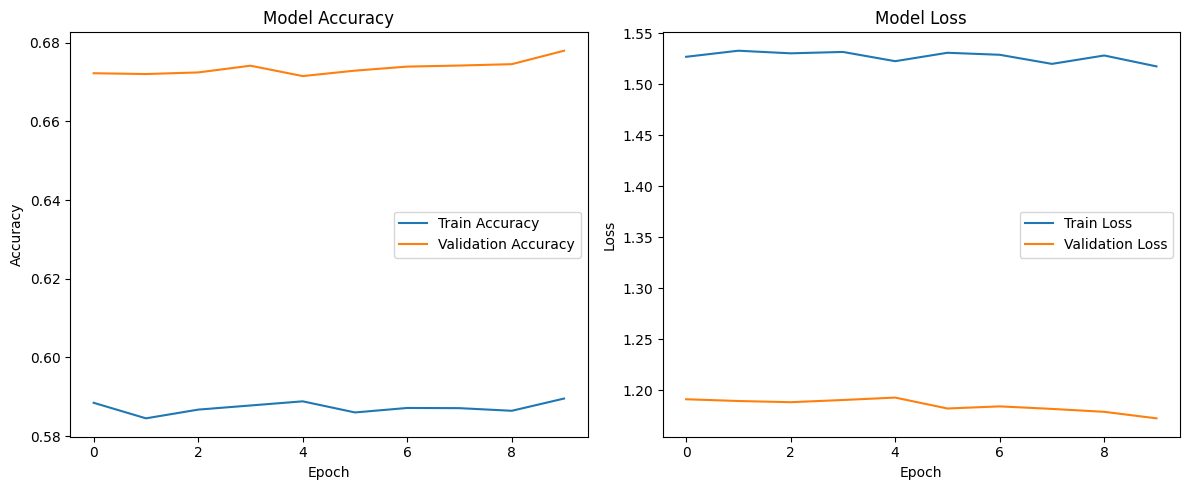

In [63]:
#clean graph 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


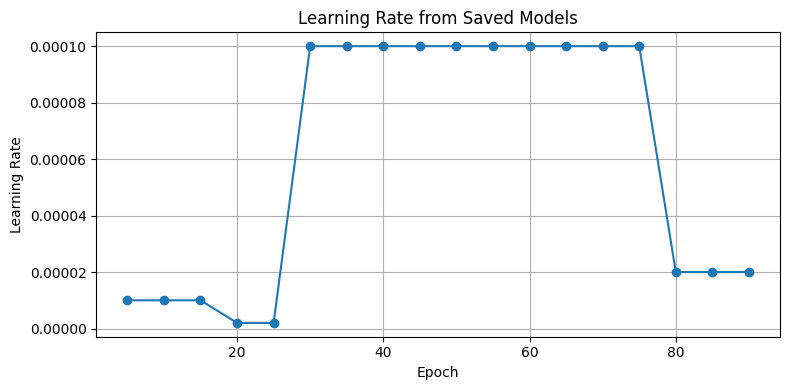

In [64]:
import os
import matplotlib.pyplot as plt
from keras.models import load_model
import re

# Path where all model checkpoints are stored
checkpoint_dir = r"C:\Users\Ashwini kannan\Downloads"

# Match files like mobilenet_epoch_epoch_30.keras
pattern = re.compile(r"mobilenet_epoch_epoch_(\d+)\.keras")

# Extract epoch and file mapping
model_files = []
for file in os.listdir(checkpoint_dir):
    match = pattern.match(file)
    if match:
        epoch = int(match.group(1))
        path = os.path.join(checkpoint_dir, file)
        model_files.append((epoch, path))

# Sort by epoch
model_files.sort()

# Extract learning rates
epochs = []
lrs = []

for epoch, filepath in model_files:
    try:
        model = load_model(filepath)
        lr = float(model.optimizer.learning_rate.numpy())
        epochs.append(epoch)
        lrs.append(lr)
    except Exception as e:
        print(f"Failed to load {filepath}: {e}")

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(epochs, lrs, marker='o')
plt.title("Learning Rate from Saved Models")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [70]:
import pandas as pd

cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
cm_df.to_excel("confusion_matrix_food101.xlsx")
print("Confusion matrix saved to Excel.")


Confusion matrix saved to Excel.


In [72]:
tf.keras.callbacks.ReduceLROnPlateau
tf.keras.optimizers.schedules.ExponentialDecay
tf.keras.optimizers.schedules.PiecewiseConstantDecay


keras.src.optimizers.schedules.learning_rate_schedule.PiecewiseConstantDecay

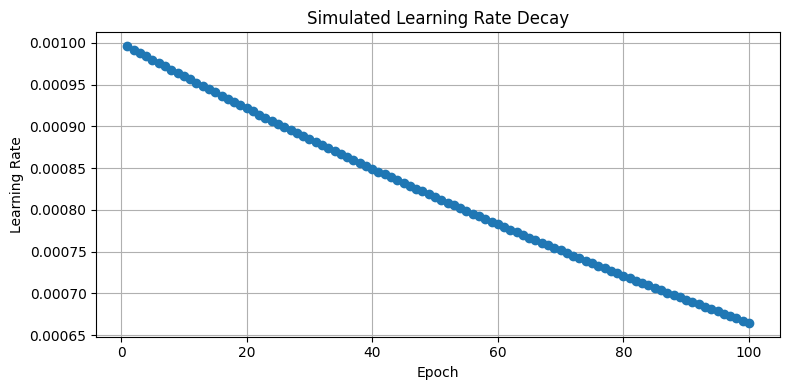

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated exponential decay: lr = initial_lr * decay_rate ^ (epoch / decay_steps)
epochs = np.arange(1, 101)
initial_lr = 0.001
decay_rate = 0.96
decay_steps = 10
lrs = initial_lr * decay_rate ** (epochs / decay_steps)

plt.figure(figsize=(8, 4))
plt.plot(epochs, lrs, marker='o')
plt.title("Simulated Learning Rate Decay")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


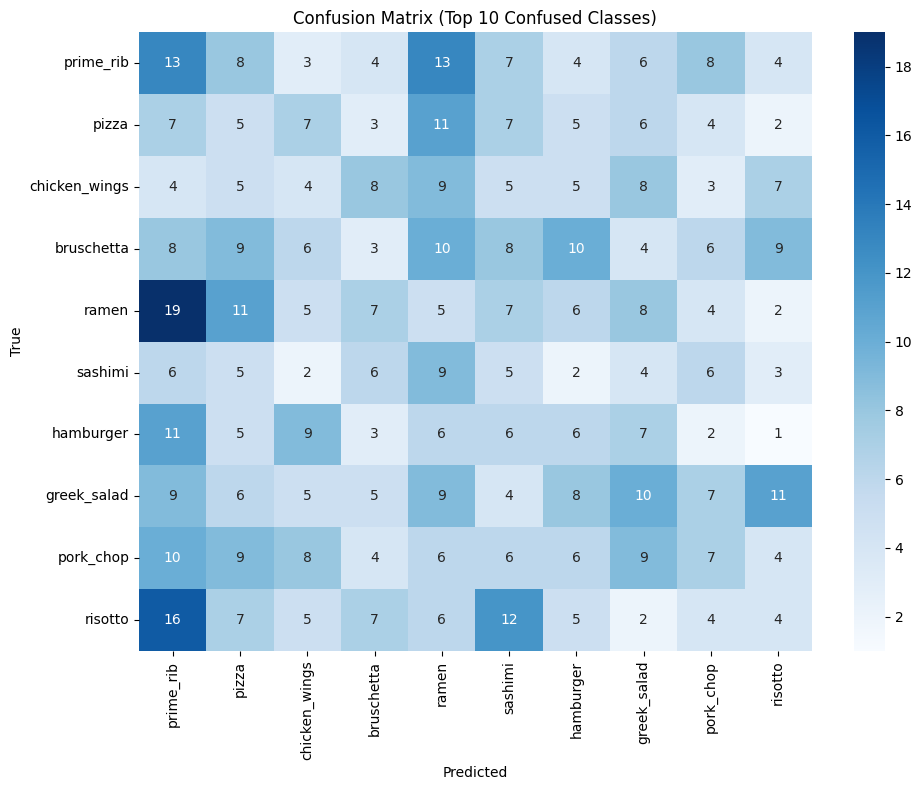

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Convert prediction probabilities to predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Get class names from the validation generator
class_names = list(val_gen.class_indices.keys())

# Compute total misclassifications per class
misclassified_counts = np.sum(cm, axis=1) - np.diag(cm)

# Select top N most misclassified classes
top_n = 10
top_indices = np.argsort(misclassified_counts)[-top_n:]
top_labels = [class_names[i] for i in top_indices]

# Subset confusion matrix for top classes
cm_top = cm[np.ix_(top_indices, top_indices)]

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm_top, annot=True, fmt='d', xticklabels=top_labels, yticklabels=top_labels, cmap="Blues")
plt.title("Confusion Matrix (Top 10 Confused Classes)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [75]:
import pandas as pd

cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
cm_df.to_csv("full_confusion_matrix.csv")
print("Saved full confusion matrix to 'full_confusion_matrix.csv'")


Saved full confusion matrix to 'full_confusion_matrix.csv'


In [77]:
import pandas as pd

accuracy_df = pd.DataFrame({
    "Class": class_names,
    "Accuracy": per_class_accuracy
})

accuracy_df.to_csv("per_class_accuracy.csv", index=False)
print("Saved per-class accuracy to 'per_class_accuracy.csv'")


Saved per-class accuracy to 'per_class_accuracy.csv'


1517/1517 ━━━━━━━━━━━━━━━━━━━━ 758s 498ms/step
 Saved per-class accuracy to 'per_class_accuracy.csv'


<Figure size 1000x1000 with 0 Axes>

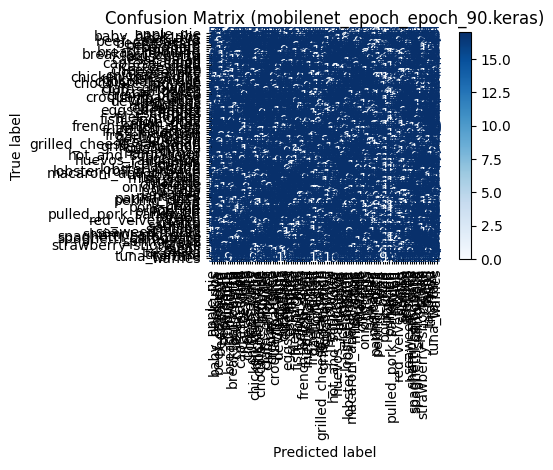

Classification Report:
                          precision    recall  f1-score   support

              apple_pie       0.01      0.01      0.01       479
         baby_back_ribs       0.01      0.01      0.01       472
                baklava       0.01      0.01      0.01       472
         beef_carpaccio       0.02      0.02      0.02       465
           beef_tartare       0.01      0.01      0.01       483
             beet_salad       0.01      0.01      0.01       472
               beignets       0.02      0.02      0.02       524
               bibimbap       0.01      0.01      0.01       475
          bread_pudding       0.00      0.00      0.00       477
      breakfast_burrito       0.01      0.01      0.01       471
             bruschetta       0.01      0.01      0.01       537
           caesar_salad       0.00      0.00      0.00       471
                cannoli       0.01      0.01      0.01       486
          caprese_salad       0.01      0.01      0.01       456


In [103]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# from tensorflow.keras.models import load_model

# # Load your specified model from full path
# final_model = load_model(r"C:\Users\Ashwini kannan\Downloads\mobilenet_epoch_epoch_90.keras")

# # Get true labels
# y_true = val_gen.classes

# # Predict using the final model
# y_pred = final_model.predict(val_gen, verbose=1)
# y_pred_classes = np.argmax(y_pred, axis=1)

# # Get class names
# class_names = list(val_gen.class_indices.keys())

# # === Confusion Matrix ===
# cm = confusion_matrix(y_true, y_pred_classes)

# # === Per-class Accuracy ===
# per_class_accuracy = cm.diagonal() / cm.sum(axis=1)

# # Save per-class accuracy to CSV
# accuracy_df = pd.DataFrame({
#     "Class": class_names,
#     "Accuracy": per_class_accuracy
# })
# accuracy_df.to_csv("per_class_accuracy.csv", index=False)
# print(" Saved per-class accuracy to 'per_class_accuracy.csv'")

# # === Display Confusion Matrix ===
# plt.figure(figsize=(10, 10))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# disp.plot(xticks_rotation=90, cmap="Blues")
# plt.title("Confusion Matrix (mobilenet_epoch_epoch_90.keras)")
# plt.tight_layout()
# plt.show()

# # === Classification Report ===
# report = classification_report(y_true, y_pred_classes, target_names=class_names)
# print("Classification Report:\n", report)


In [109]:
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Load the final model
model = load_model(r"C:\Users\Ashwini kannan\Downloads\mobilenet_epoch_epoch_90.keras")

# Get true labels
y_true = val_gen.classes

# Predict using the model
y_pred = model.predict(val_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get class names
class_names = list(val_gen.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Print as a labeled table
print("\nConfusion Matrix:\n")
print(f"{'':20}", end='')
for label in class_names:
    print(f"{label:15}", end='')
print()
for i, row in enumerate(cm):
    print(f"{class_names[i]:20}", end='')
    for val in row:
        print(f"{val:<15}", end='')
    print()


1517/1517 ━━━━━━━━━━━━━━━━━━━━ 757s 498ms/step

Confusion Matrix:

                    apple_pie      baby_back_ribs baklava        beef_carpaccio beef_tartare   beet_salad     beignets       bibimbap       bread_pudding  breakfast_burritobruschetta     caesar_salad   cannoli        caprese_salad  carrot_cake    ceviche        cheese_plate   cheesecake     chicken_curry  chicken_quesadillachicken_wings  chocolate_cake chocolate_moussechurros        clam_chowder   club_sandwich  crab_cakes     creme_brulee   croque_madame  cup_cakes      deviled_eggs   donuts         dumplings      edamame        eggs_benedict  escargots      falafel        filet_mignon   fish_and_chips foie_gras      french_fries   french_onion_soupfrench_toast   fried_calamari fried_rice     frozen_yogurt  garlic_bread   gnocchi        greek_salad    grilled_cheese_sandwichgrilled_salmon guacamole      gyoza          hamburger      hot_and_sour_souphot_dog        huevos_rancheroshummus         ice_cream      lasagna  